In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import heapq

# Danh sách cạnh: (đỉnh 1, đỉnh 2, trọng số)
edges = [
    ('A', 'B', 3),
    ('A', 'D', 8),
    ('A', 'H', 10),
    ('E', 'F', 13),
    ('B', 'C', 2),
    ('I', 'F', 14),
    ('C', 'D', 7),
    ('D', 'E', 18),
    ('E', 'I', 3),
    ('D', 'I', 23),
    ('D', 'H', 30),
    ('G', 'F', 15),
    ('G', 'I', 13),
    ('G', 'H', 11),
    ('H', 'I', 11),
    
]

# Tìm danh sách tất cả các đỉnh
nodes = set()
for u, v, _ in edges:
    nodes.add(u)
    nodes.add(v)




In [2]:
# Hàm Prim
def prim(edges, start):
    adj = {node: [] for node in nodes}
    for u, v, w in edges:
        adj[u].append((w, v))
        adj[v].append((w, u))  # vì là đồ thị vô hướng

    visited = set()
    mst = []
    min_heap = []

    visited.add(start)
    for weight, v in adj[start]:
        heapq.heappush(min_heap, (weight, start, v))

    while min_heap:
        weight, u, v = heapq.heappop(min_heap)
        if v not in visited:
            visited.add(v)
            mst.append((u, v, weight))
            for next_weight, next_node in adj[v]:
                if next_node not in visited:
                    heapq.heappush(min_heap, (next_weight, v, next_node))

    return mst

# Tìm MST bằng Prim từ đỉnh 'A'
mst_edges = prim(edges, 'A')

# In kết quả ra terminal
print("Cây khung nhỏ nhất (Prim) gồm các cạnh:")
for u, v, w in mst_edges:
    print(f"{u} - {v} với trọng số {w}")

# Tổng trọng số của MST
total_weight = sum(w for _, _, w in mst_edges)
print(f"Tổng độ dài của cây khung nhỏ nhất: {total_weight}")



Cây khung nhỏ nhất (Prim) gồm các cạnh:
A - B với trọng số 3
B - C với trọng số 2
C - D với trọng số 7
A - H với trọng số 10
H - G với trọng số 11
H - I với trọng số 11
I - E với trọng số 3
E - F với trọng số 13
Tổng độ dài của cây khung nhỏ nhất: 60


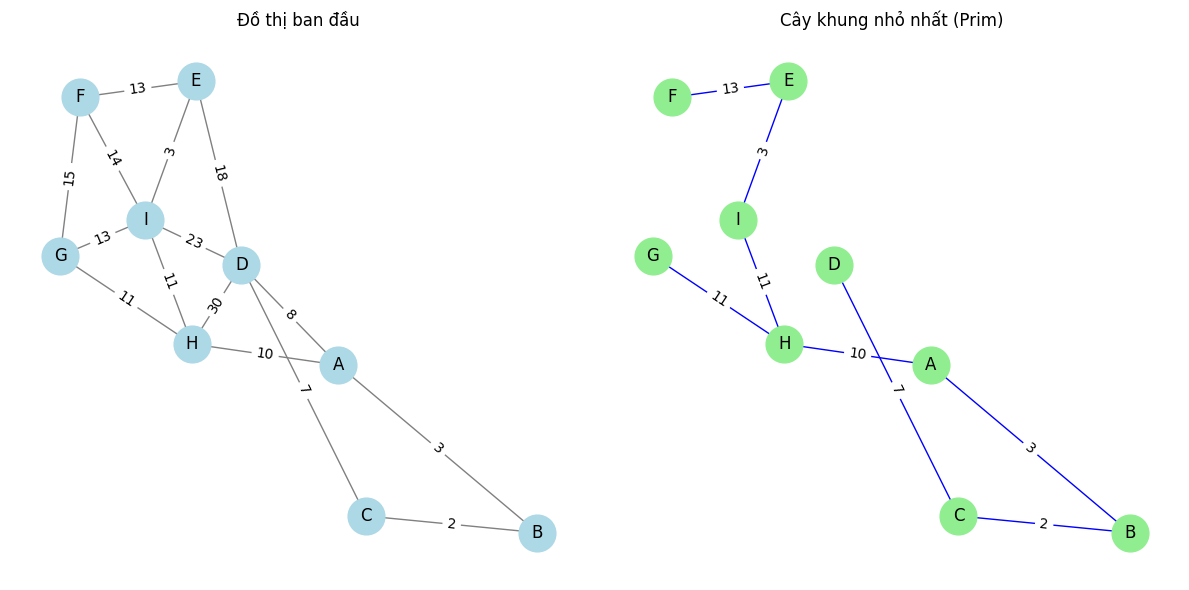

In [3]:
# Tạo đồ thị ban đầu và MST
G_original = nx.Graph()
G_original.add_weighted_edges_from(edges)

G_mst = nx.Graph()
G_mst.add_weighted_edges_from(mst_edges)

# Vẽ đồ thị
pos = nx.spring_layout(G_original, seed=42)

plt.figure(figsize=(12, 6))

# Đồ thị ban đầu
plt.subplot(1, 2, 1)
nx.draw(G_original, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=700, font_size=12)
labels = nx.get_edge_attributes(G_original, 'weight')
nx.draw_networkx_edge_labels(G_original, pos, edge_labels=labels)
plt.title("Đồ thị ban đầu")

# Cây khung nhỏ nhất (Prim)
plt.subplot(1, 2, 2)
nx.draw(G_mst, pos, with_labels=True, node_color='lightgreen', edge_color='blue', node_size=700, font_size=12)
labels_mst = nx.get_edge_attributes(G_mst, 'weight')
nx.draw_networkx_edge_labels(G_mst, pos, edge_labels=labels_mst)
plt.title("Cây khung nhỏ nhất (Prim)")

plt.tight_layout()
plt.show()